<a href="https://colab.research.google.com/github/jayeshsaini/Data-Lit/blob/master/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Neccessory Libraries

In [27]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [12]:
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       2768            True  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      11028            True  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4470            True  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         39           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       2732           False  
two-sigma-financial-news                           2019-07-15 23:59:00  Featured          $100,000      

In [13]:
!kaggle competitions download digit-recognizer

 85% 62.0M/73.2M [00:00<00:00, 100MB/s] 
100% 73.2M/73.2M [00:00<00:00, 165MB/s]
 84% 41.0M/48.8M [00:00<00:00, 63.5MB/s]
100% 48.8M/48.8M [00:00<00:00, 98.1MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 76.7MB/s]


In [14]:
!ls

sample_data  sample_submission.csv  test.csv  train.csv


Importing csv file and printing the head of train

In [0]:
data = pd.read_csv('train.csv')

In [16]:
data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

Distribution of data

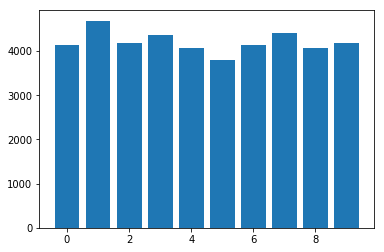

In [17]:
num_stats = defaultdict(int)

for num in data['label']:
    num_stats[num] += 1

x = sorted(num_stats)
y = [num_stats[num] for num in x]

plt.bar(x, height=y)
plt.xlabel = 'Image Content'
plt.ylabel = 'Frequency'
plt.title = 'Distribution of MNIST'
plt.show()

In [18]:
data.shape

(42000, 785)

Droping the not applicables.

In [19]:
data.dropna().shape

(42000, 785)

removing the labels from dataset.

In [0]:
result = data['label']
predictors = data.drop(['label'], axis=1)

Standardising the values

In [21]:
from sklearn.decomposition import PCA

X_std = StandardScaler().fit_transform(predictors.values)

pca = PCA(n_components=2)
x_2 = pca.fit(X_std).transform(X_std)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



K mean cluster from scratch
defined init method and selected 9 clusters, tol is tolerance, max_iter is our cycle.
Set a KMeans clustering with 9 components cuz there are 9 class labels

I have taken an empty dictionary which will be used for centroids and then I have used for loop I have assign a centroid. after start iterating using max_iter and I started with empty classification then calculate the distance of the features from our current centroid and classify them. 

In [0]:
class K_Means:
    def __init__(self, k=9, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


After above process we will visualize our clusters using matplotlib

In [0]:
kmeans = K_Means()
kmeans.fit(x_2)
kmeans.predict(x_2)

colors = 10*["green","red","gold","blue","silver", "yellow", "brown", "violet", "purple"]

for centroid in kmeans.centroids:
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in kmeans.classifications:
    color = colors[classification]
    for featureset in kmeans.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()


631.021208138618
937.4970435497954
142.03555898401996
7.235946887905721
141.4308880306893
81.49600811046558
13.680262455080513
68.43706287206139
18.891979755859456
35.08559676626209
93.02320099268997
29.458717181554643
22.36847609392555
22.49784449221335
9.333726917039487
4.314689773411559
12.491432405973029
9.12979560774083
11.527321089720473
11.532125748430278
4.175415728766951
2.3224454816476694
2.5105445191166122
7.929927115237781
7.717153952435174
1.5055577130658615
3.133151805139153
5.717004638716935
6.432039164955909
0.8917151171809325
1.1633080948145058
4.233986970869139
4.677380218635289
0.2216677668277404
0.942670658729269
3.374738571188745
3.0870653774422587
0.30887086879762504
2.3601134507089663
3.079652915443771
2.378412330057455
0.03285285586918804
1.018720158894149
2.620528128900207
1.622674220291052
0.8982205758819697
2.1687378456101425
0.19333863281967234
1.073598976272115
0.951997965565241
0.5593502664108642
0.09795562080475795
1.4972079312906073
0.5827635074571126
1.

In [29]:
#with directly using Kmeans
kmeans = KMeans(n_clusters=9)
# Compute cluster centers and predict cluster indices
kmeans_9 = kmeans.fit_predict(x_2)

data = [
    go.Scatter(
        x= x_2[:, 0], 
        y= x_2[:, 1], 
        mode="markers",
        showlegend=False,
        marker=dict(
            size=8,
            color = kmeans_9,
            colorscale = 'Rainbow',
            showscale=False, 
            line = dict(
                width = 2,
                color = 'rgb(255, 255, 255)'
            )))]

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= True
)

fig = dict(data = data, layout = layout)
py.iplot(fig, filename="kmeans_plot")